# Arj Hraghi & Ahmed Gharsallah





In [1]:
from shutil import copyfile
import os
import numpy as np
import os
from platform import platform
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing import image
from keras.layers import  GlobalAveragePooling2D, Lambda
from keras.backend import l2_normalize
from keras.models import Model
from glob import iglob
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input


In [ ]:
inception_category = InceptionResNetV2(include_top=True, weights='imagenet')
inception_conv = InceptionResNetV2(include_top=False, weights='imagenet')
global_pooling = GlobalAveragePooling2D()(inception_conv.output)
norm_lambda = Lambda(lambda  x: l2_normalize(x,axis=1))(global_pooling)
feature_extractor = Model(inputs=[inception_conv.input], outputs=[norm_lambda])
feature_extractor.compile(optimizer='rmsprop', loss='mse')


219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
def LoadAndProcessImage(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)



In [ ]:
def PredictImageCategory(img_path):
    img = LoadAndProcessImage(img_path)
    preds = inception_category.predict(img)
    decoded_preds = decode_predictions(preds)[0]
    return [decoded_preds[i][1] for i in range(0, len(decoded_preds))]




In [ ]:
def CreateImageFeaturesVector(img_path):

    img = LoadAndProcessImage(img_path)
    features_vector = feature_extractor.predict(img)

    return features_vector.flatten()

In [ ]:
image_preprocessed=LoadAndProcessImage('/content/drive/MyDrive/BE/01.jpg')

In [ ]:
CreateImageFeaturesVector('/content/drive/MyDrive/BE/01.jpg')

1/1 [==============================] - 5s 5s/step


array([0.00012128, 0.01856365, 0.        , ..., 0.00120709, 0.        ,
       0.00192298], dtype=float32)

In [ ]:
database='/content/drive/MyDrive/BE'

In [ ]:
image_paths = [database + '/'+img_name for img_name in os.listdir(database)]
features_list = [CreateImageFeaturesVector(img_path) for img_path in image_paths]
features_array = np.array(features_list)

1/1 [==============================] - 1s 836ms/step


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=4, metric='cosine')
knn.fit(features_array)

NearestNeighbors(metric='cosine', n_neighbors=4)

In [38]:
from IPython.display import Image, display
def GetTopSimilar(image_name):
  query_image_path = database + image_name
  query_features = CreateImageFeaturesVector(query_image_path)
  query_features = np.array(query_features).reshape(1, -1)
  distances, indices = knn.kneighbors(query_features, n_neighbors=4)




  print("Query Image:")
  display(Image(filename=query_image_path))


  print("\nTop 3 Similar Images:")
  similar_images = [image_paths[indices[0, i]] for i in range(1, 4)]


  for similar_image_path in similar_images:
      display(Image(filename=similar_image_path))




1/1 [==============================] - 1s 866ms/step
Query Image:


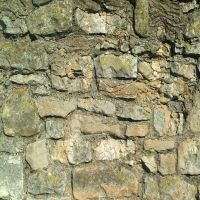


Top 3 Similar Images:


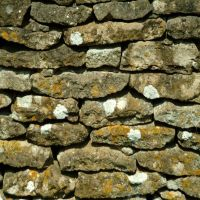

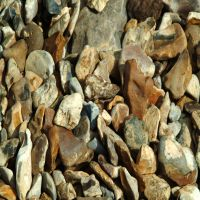

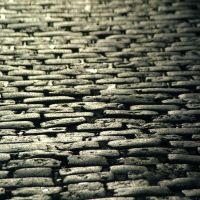

In [40]:
GetTopSimilar('/01.jpg')